In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# import mysql.connector as cnt
# import plotly.express as px

In [2]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [13]:
X = dataset[:, 1:2].astype(int) # 1 stulpelis, visos eilutės kaip X -features set'as

y = dataset[:, 2].astype(int)


In [6]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)



DecisionTreeRegressor(random_state=0)

In [15]:
y_pred = regressor.predict([[3750]])
# print the predicted price
print("Predicted price: % d\n"% y_pred)


Predicted price:  8000



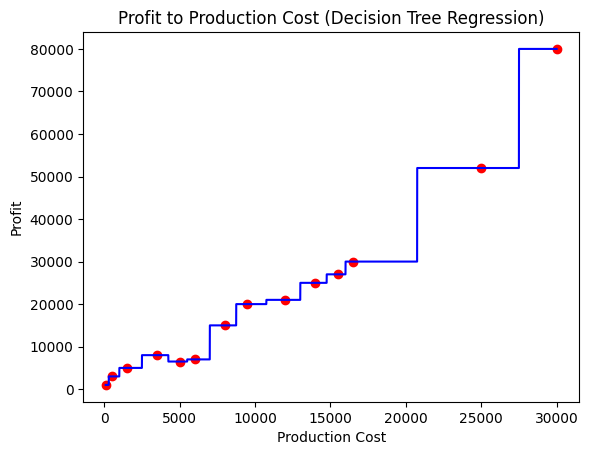

In [16]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))


plt.scatter(X, y, color = 'red')
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)')
# specify X axis label
plt.xlabel('Production Cost')
# specify Y axis label
plt.ylabel('Profit')
# show the plot
plt.show() 


In [17]:
y_p = regressor.predict(X)
accuracy_score(y, y_p)

1.0

In [18]:
# import export_graphviz
from sklearn.tree import export_graphviz

In [19]:
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])


In [ ]:
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Tiesinės regresijos ir sprendimų medžio (regresoriaus) palyginimas :
#     paimkite savo darytą automobilių bei butų (pardavimui)
#     kainos spėjimo algoritmą su linijine regresija,
#     tuos pačius duomenis pateikite DecissionTreeRegressor().
#     Abiem atvejais paskaičiuokite accuracy_score, patestuokite su 2-5 vartotojo įvestimis.
#     Kuris modelis davė tikslesnius rezultatus? 

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

fit score: 48.81027082680627


<Axes: >

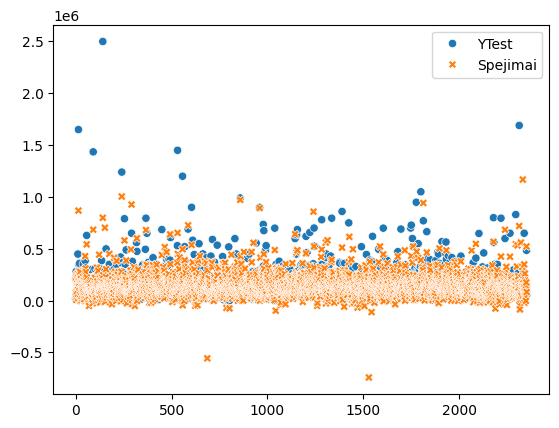

In [25]:
# linijinė aruodas
SDB = sqlite3.connect('aruodas.db')
C = SDB.cursor()
sql="""select *   from Aruodas;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

def plotas(x):
    # if 'm²' in x:
    if x is not None:
        return float(x.replace(' m²', '',).replace(',', '.'))
    else:
        return np.nan
    
df['plotas'] = df['Plotas:'].apply(plotas)

def amzius(x):
    return  2024 - int(x[:4])

df['amzius'] = df['Metai:'].apply(amzius)

aruodas = df[['miestas', 'rajonas', 'gatve', 'kaina', 'kv_kaina', 'Kambarių sk.:',
       'Aukštas:', 'Aukštų sk.:', 'Pastato tipas:', 'Šildymas:',
       'Įrengimas:','plotas', 'amzius']]
aruodas.dropna(inplace=True)

aruodas['Kambarių sk.:'] = aruodas['Kambarių sk.:'].apply(lambda x: int(x))
aruodas['Aukštas:'] = aruodas['Aukštas:'].apply(lambda x: int(x))
aruodas['Aukštų sk.:'] = aruodas['Aukštų sk.:'].apply(lambda x: int(x))
# aruodas.info()

l = LabelEncoder().fit_transform(aruodas['miestas'])
aruodas['miestas'] = l
l = LabelEncoder().fit_transform(aruodas['rajonas'])
aruodas['rajonas'] = l
l = LabelEncoder().fit_transform(aruodas['gatve'])
aruodas['gatve'] = l
l = LabelEncoder().fit_transform(aruodas['Pastato tipas:'])
aruodas['Pastato tipas:'] = l
l = LabelEncoder().fit_transform(aruodas['Šildymas:'])
aruodas['Šildymas:'] = l
l = LabelEncoder().fit_transform(aruodas['Įrengimas:'])
aruodas['Įrengimas:'] = l
# aruodas.head()

X = aruodas.drop(columns=['kaina', 'kv_kaina'])
y = aruodas['kaina'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fit = LinearRegression().fit(X_train, y_train)
predicted = fit.predict(X_test)

spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)
# res.head()
fit_score = fit.score(X_test, y_test) * 100.0
print(f'fit score: {fit_score}')
sns.scatterplot(data=res)

In [30]:
#  Desicion tree
SDB = sqlite3.connect('aruodas.db')
C = SDB.cursor()
sql="""select *   from Aruodas;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

def plotas(x):
    # if 'm²' in x:
    if x is not None:
        return float(x.replace(' m²', '',).replace(',', '.'))
    else:
        return np.nan
    
df['plotas'] = df['Plotas:'].apply(plotas)

def amzius(x):
    return  2024 - int(x[:4])

df['amzius'] = df['Metai:'].apply(amzius)

aruodas = df[['miestas', 'rajonas', 'gatve', 'kaina', 'kv_kaina', 'Kambarių sk.:',
       'Aukštas:', 'Aukštų sk.:', 'Pastato tipas:', 'Šildymas:',
       'Įrengimas:','plotas', 'amzius']]
aruodas.dropna(inplace=True)

aruodas['Kambarių sk.:'] = aruodas['Kambarių sk.:'].apply(lambda x: int(x))
aruodas['Aukštas:'] = aruodas['Aukštas:'].apply(lambda x: int(x))
aruodas['Aukštų sk.:'] = aruodas['Aukštų sk.:'].apply(lambda x: int(x))
# aruodas.info()

l = LabelEncoder().fit_transform(aruodas['miestas'])
aruodas['miestas'] = l
l = LabelEncoder().fit_transform(aruodas['rajonas'])
aruodas['rajonas'] = l
l = LabelEncoder().fit_transform(aruodas['gatve'])
aruodas['gatve'] = l
l = LabelEncoder().fit_transform(aruodas['Pastato tipas:'])
aruodas['Pastato tipas:'] = l
l = LabelEncoder().fit_transform(aruodas['Šildymas:'])
aruodas['Šildymas:'] = l
l = LabelEncoder().fit_transform(aruodas['Įrengimas:'])
aruodas['Įrengimas:'] = l

# Assuming 'aruodas' is your DataFrame
X = aruodas.drop(columns=['kaina', 'kv_kaina'])
y = aruodas['kaina'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate and train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict using the trained model
predicted = regressor.predict(X_test)

# Convert predictions and actual values to pandas Series for comparison
spejimai = pd.Series(data=predicted, name='Spejimai')
orig_rez = pd.Series(data=y_test, name='YTest')

# Combine the predictions and actual values into a DataFrame
res = pd.concat([orig_rez.reset_index(drop=True), spejimai], axis=1)

# Calculate the R^2 score (goodness of fit)
fit_score = fit.score(X_test, y_test) * 100.0

# Print the R^2 score
print(f'fit score: {fit_score}')

# print(f'fit score: {fit_score}')
# sns.scatterplot(data=res)

fit score: 43.381044402719006


In [ ]:
# Antra - logistinės regresijos ir sprendimų medžio (classsifier) palyginimas - 
# paimkite savo ankstesnį kodą, skirtą nustatyti,
# ar eismo įvykis buv su gyvūnu, ar ne, atliktą su logistine regresija.
# Pritaikykite DecisionTreeClassifier().
# paskaičiuokite accuracy_score abiems atvejams.
# Vizualizuokite comfusiom matrix abiems atvejams. 
# Patestuokite su keliais konkrečiais atvejais.
# Kuris modelis spėdavo geriau?
# Abiems atvejais vizualizuokite sprendimų medžio algoritmą (gaukite iliustraciją)

In [ ]:
# mport kagglehub
# # Download latest version
# path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
# print("Path to dataset files:", path)

# UŽDUOTIS _ Aptikti sukčiavimą (fraud)

# Stulpelių reikšmės:

# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction

# Pradžia yra kodas, kuris jums atsiųs CSV failą ir išsaugos adresu $path

# pateikti accuracy score tree ir logistic atvejais,
# bei confusion matrix vizualizacijas su seaborn'o heatmap'u
# taigi, 3 pranešimai į chat'ą

In [31]:
import kagglehub
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:07<00:00, 24.5MB/s] 

Extracting files...


Path to dataset files: C:\Users\Lukas\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [34]:
df = pd.read_csv(path+"/onlinefraud.csv")
# df = pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [35]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [36]:
categorical_columns = ['type', 'nameDest', 'nameOrig']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
X = df.drop(columns=['isFraud',])  # Features
y = df['isFraud']  # Target (Loan approval: Y/N)

X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 99.90821391187907


<Axes: >

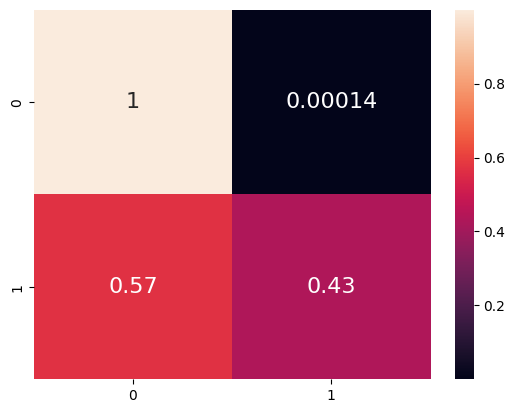

In [40]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})

In [43]:
# tree
X = df.drop(columns=['isFraud',])  # Features
y = df['isFraud']  # Target (Loan approval: Y/N)

# X_train, X_test,\
# y_train, y_test = train_test_split(X, y,
# test_size=0.20,
# random_state=23)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# DecisionTreeClassifier(random_state=42) naudojam kai spejam
# ne skaiciu (pvz. kaina), o atributą (pvz. fraud or ne fraud)

# Kaina naudoti DecisionTreeRegressor(random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'score: {accuracy}')


score: 0.9996856641416607


<Axes: >

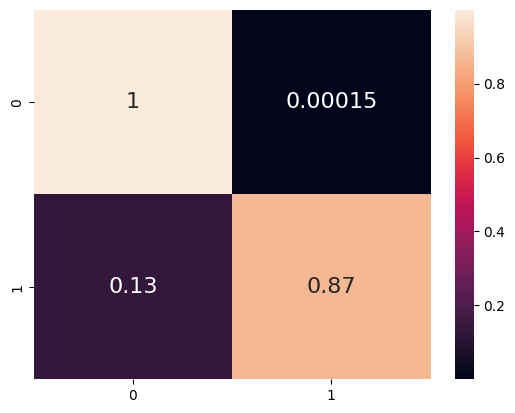

In [46]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})